In [44]:
#importing Libraries
import pandas as pd
import numpy as np
from pandas import Series , DataFrame
import scipy

from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as si
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import sklearn
from sklearn.preprocessing import scale 
from collections import Counter

In [28]:
%matplotlib inline
rcParams['figure.figsize']= 10,5
si.set_style('whitegrid')

In [7]:
df=pd.read_csv('J:/Summer 19/AI LAB/Weather Status Prediction/weather_summer.csv').set_index('date')

In [9]:
df.head()

,meantempm,MaxTemp,MinTemp,meantempm_1,meanhumidity,maxhumidity,minhumidity,meanhumidity_1,meanpressurem,maxpressurem,minpressurem,precipm,windspeed,maxdew,mindew
date,,,,,,,,,,,,,,,
01-Apr-19,27,33,21,26,60%,90%,30%,61%,1010%,1011,1008,156.3mm,2mph,24,20
02-Apr-19,26,29,22,25,62%,76%,48%,60%,1011%,1013,1009,150.6mm,3mph,23,21
03-Apr-19,29,34,24,30,61%,87%,35%,59%,1008%,1010,1006,148.40mm,2mph,21,20
04-Apr-19,28,33,23,29,59.50%,75%,44%,58.00%,1007%,1008,1005,156.3mm,3mph,25,21
05-Apr-19,29,34,24,28,61%,85%,37%,60%,1006%,1008,1004,156.3mm,6mph,22,20


In [12]:
df_data=df.ix[:,(5,11)].values
df_data_names= ['meantempm','MaxTemp']
y= df.ix[:,9].values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


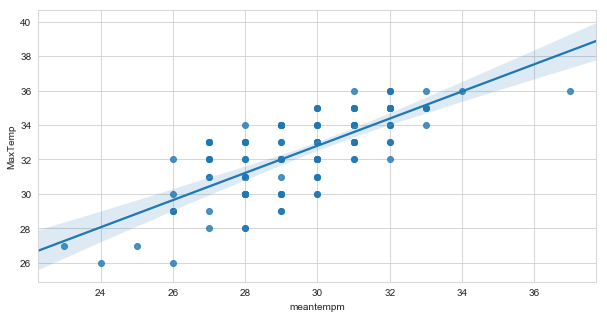

In [29]:
si.regplot(x='meantempm', y='MaxTemp', data= df, scatter=True)

In [14]:
df.isnull().sum()

meantempm         0
MaxTemp           0
MinTemp           0
meantempm_1       0
meanhumidity      0
maxhumidity       0
minhumidity       0
meanhumidity_1    0
meanpressurem     0
maxpressurem      0
minpressurem      0
precipm           0
windspeed         0
maxdew            0
mindew            0
dtype: int64

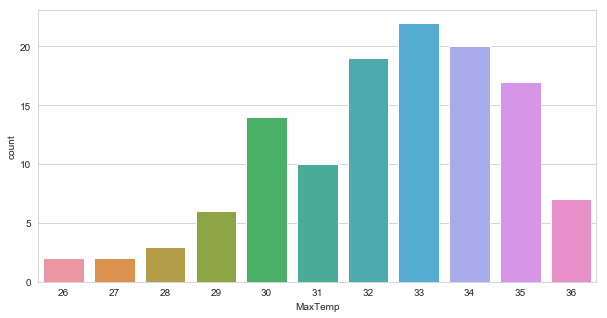

In [30]:
si.countplot(x='MaxTemp', data=df)

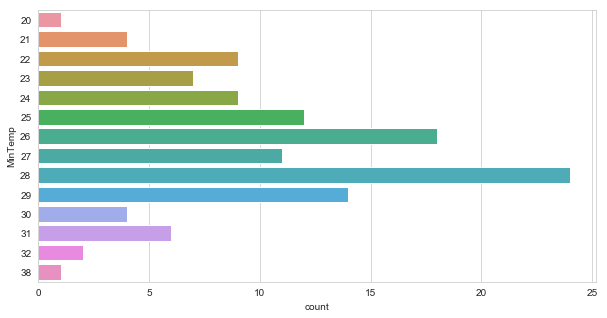

In [31]:
si.countplot(y='MinTemp', data=df)

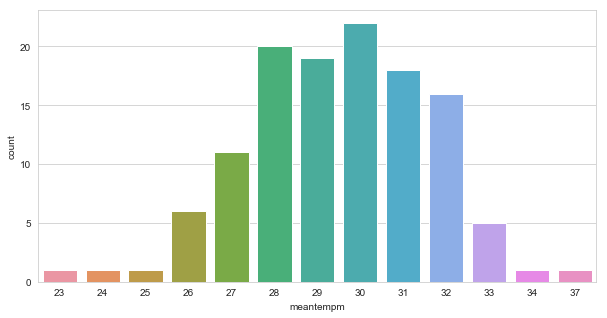

In [32]:
si.countplot(x='meantempm', data=df)

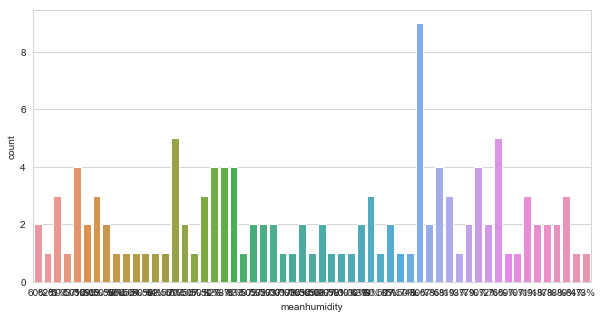

In [33]:
si.countplot(x='meanhumidity', data=df)

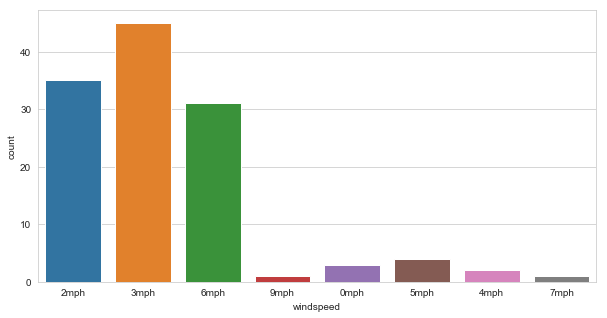

In [35]:
si.countplot(x='windspeed', data=df)

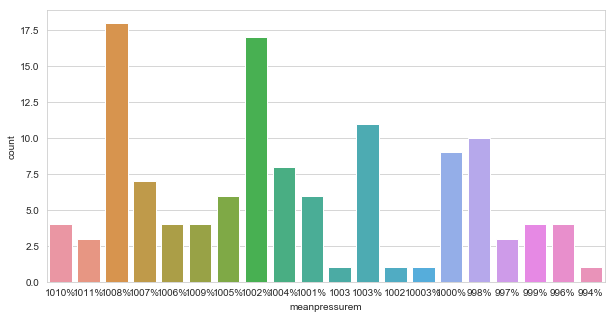

In [34]:
  si.countplot(x='meanpressurem', data=df)

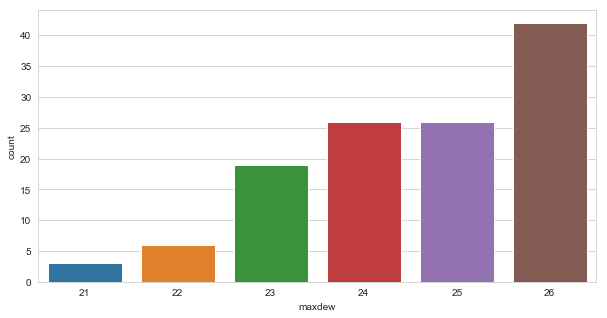

In [36]:
   si.countplot(x='maxdew', data=df)

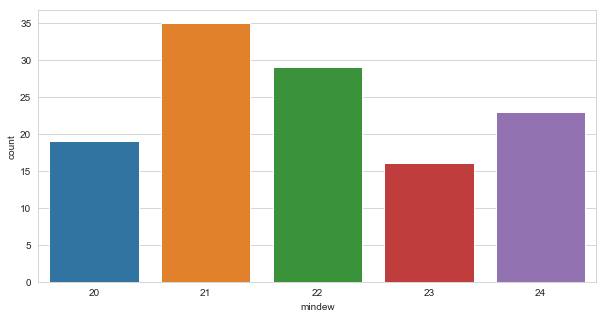

In [37]:
   si.countplot(x='mindew', data=df)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 01-Apr-19 to 31-Jul-19
Data columns (total 15 columns):
meantempm         122 non-null int64
MaxTemp           122 non-null int64
MinTemp           122 non-null int64
meantempm_1       122 non-null int64
meanhumidity      122 non-null object
maxhumidity       122 non-null object
minhumidity       122 non-null object
meanhumidity_1    122 non-null object
meanpressurem     122 non-null object
maxpressurem      122 non-null object
minpressurem      122 non-null object
precipm           122 non-null object
windspeed         122 non-null object
maxdew            122 non-null int64
mindew            122 non-null int64
dtypes: int64(6), object(9)
memory usage: 20.2+ KB


In [39]:
def label_encoder(df):
    for c in df.columns:
        if df[c].dtypes == 'object':
            label_encoder = LabelEncoder()
            encoded_values = label_encoder.fit_transform(df[c])
            df[c] = encoded_values
    return df

In [40]:
# Processsing NA Columns
def process_na_columns(df, tolerance=0.3):
    dataset_size = df.shape[0]
    tolerate_na_size = int(dataset_size * tolerance)
    
    for c in df.columns:
        na_counts = df[c].isna().sum()
        
        if na_counts != 0:
            if na_counts > tolerate_na_size:
                df = df.drop([c], axis=1)
            else:
                if df[c].dtypes == 'object':
                    values = df[c].value_counts()
                    max_val = values.index[0] # Highest Occurrence
                    df[c].replace(to_replace=pd.np.nan, value=max_val, inplace=True)
                else:
                    imputer = Imputer(missing_values='NaN', strategy='mean')
                    imputed_values = imputer.fit_transform(df[c].values.reshape(-1, 1))
                    df[c] = imputed_values
    return df  

In [41]:
df=pd.read_csv('J:/Summer 19/AI LAB/Weather Status Prediction/weather_summer.csv').set_index('date')
df.replace(to_replace='None', value=pd.np.nan, inplace=True)
pd.options.display.max_columns=None
pd.options.display.max_rows=None
print(df.shape)
df

(122, 15)


,meantempm,MaxTemp,MinTemp,meantempm_1,meanhumidity,maxhumidity,minhumidity,meanhumidity_1,meanpressurem,maxpressurem,minpressurem,precipm,windspeed,maxdew,mindew
date,,,,,,,,,,,,,,,
01-Apr-19,27,33,21,26,60%,90%,30%,61%,1010%,1011,1008,156.3mm,2mph,24,20
02-Apr-19,26,29,22,25,62%,76%,48%,60%,1011%,1013,1009,150.6mm,3mph,23,21
03-Apr-19,29,34,24,30,61%,87%,35%,59%,1008%,1010,1006,148.40mm,2mph,21,20
04-Apr-19,28,33,23,29,59.50%,75%,44%,58.00%,1007%,1008,1005,156.3mm,3mph,25,21
05-Apr-19,29,34,24,28,61%,85%,37%,60%,1006%,1008,1004,156.3mm,6mph,22,20
06-Apr-19,27,31,23,26,73.50%,91%,56%,71.00%,1008%,1010,1006,154.5mm,3mph,24,21
07-Apr-19,27,32,23,30,71.50%,93%,50%,70.00%,1010%,1012,1008,153.5mm,3mph,24,22
08-Apr-19,28,33,23,31,69.50%,95%,44%,68.00%,1011%,1013,1009,150.6mm,6mph,25,21
09-Apr-19,31,33,28,29,53.50%,67%,40%,52.00%,1010%,1012,1008,151.6mm,3mph,23,20


In [42]:
df = process_na_columns(df)

In [45]:
df = label_encoder(df)

In [46]:
df

,meantempm,MaxTemp,MinTemp,meantempm_1,meanhumidity,maxhumidity,minhumidity,meanhumidity_1,meanpressurem,maxpressurem,minpressurem,precipm,windspeed,maxdew,mindew
date,,,,,,,,,,,,,,,
01-Apr-19,27,33,21,26,3,21,1,6,13,11,8,11,1,24,20
02-Apr-19,26,29,22,25,5,8,10,5,14,13,9,2,2,23,21
03-Apr-19,29,34,24,30,4,18,2,4,11,10,6,0,1,21,20
04-Apr-19,28,33,23,29,2,7,8,3,10,8,5,11,2,25,21
05-Apr-19,29,34,24,28,4,17,4,5,9,8,4,11,5,22,20
06-Apr-19,27,31,23,26,30,22,16,20,11,10,6,8,2,24,21
07-Apr-19,27,32,23,30,24,24,11,19,13,12,8,6,2,24,22
08-Apr-19,28,33,23,31,19,26,8,17,14,13,9,2,5,25,21
09-Apr-19,31,33,28,29,1,2,6,1,13,12,8,4,2,23,20


In [47]:
y = df['meantempm']
X = df.drop(['MaxTemp', 'meantempm'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [48]:
log_r = LogisticRegression()
log_r.fit(X_train, y_train)
log_r.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.12903225806451613

In [57]:
LogReg=LogisticRegression()
LogReg.fit(X, y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
y_pred=LogReg.predict(X)
from sklearn.metrics import classification_report
print (classification_report(y,y_pred))

              precision    recall  f1-score   support

          23       1.00      1.00      1.00         1
          24       0.00      0.00      0.00         1
          25       1.00      1.00      1.00         1
          26       0.50      0.33      0.40         6
          27       0.53      0.73      0.62        11
          28       0.60      0.60      0.60        20
          29       0.41      0.37      0.39        19
          30       0.43      0.55      0.48        22
          31       0.60      0.50      0.55        18
          32       0.73      0.69      0.71        16
          33       0.75      0.60      0.67         5
          34       1.00      1.00      1.00         1
          37       1.00      1.00      1.00         1

   micro avg       0.56      0.56      0.56       122
   macro avg       0.66      0.64      0.65       122
weighted avg       0.56      0.56      0.55       122



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
